In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


<AxesSubplot:xlabel='Date'>

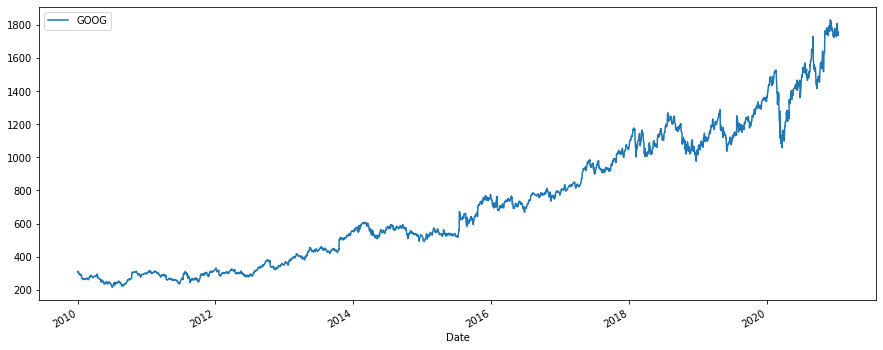

In [2]:
ticker = 'GOOG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1')['Adj Close']
#Plot
data.plot(figsize=(15,6))

d:\envs\xylab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

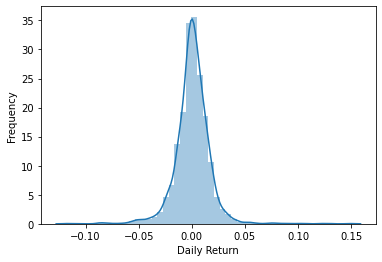

In [3]:
log_return = np.log(1 + data.pct_change())
#Plot

sns.distplot(log_return.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [4]:
u = log_return.mean()
var = log_return.var()
drift = u - (0.5*var)

In [5]:
drift
u

GOOG    0.000621
dtype: float64

In [6]:
stdev = log_return.std()
days = 50
trials = 10000
Z = norm.ppf(np.random.rand(days, trials)) #days, trials
daily_returns = np.exp(drift.values + stdev.values * Z)

In [7]:
np.min(Z)

-5.253415072569358

In [8]:
data.iloc[-1]

GOOG    1736.189941
Name: 2021-01-15 00:00:00, dtype: float64

In [9]:
daily_returns.shape

(50, 10000)

In [18]:
price_paths = np.zeros_like(daily_returns)
price_paths[0] = data.iloc[-1]
print(price_paths[0])
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]


[1736.18994141 1736.18994141 1736.18994141 ... 1736.18994141 1736.18994141
 1736.18994141]


In [11]:
price_paths[0]

array([1736.18994141, 1736.18994141, 1736.18994141, ..., 1736.18994141,
       1736.18994141, 1736.18994141])

In [12]:
len(price_paths)

50

In [13]:
ret = []
for x in price_paths:
    ret.append(x[:500])

In [14]:
d1 = np.array(ret)

In [15]:
d1 =d1.T

In [20]:
data

,GOOG
Date,
2009-12-31,308.832428
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
...,...
2021-01-11,1766.719971
2021-01-12,1746.550049
2021-01-13,1754.400024


Text(0.5, 1.0, 'Tsla stock price prediction')

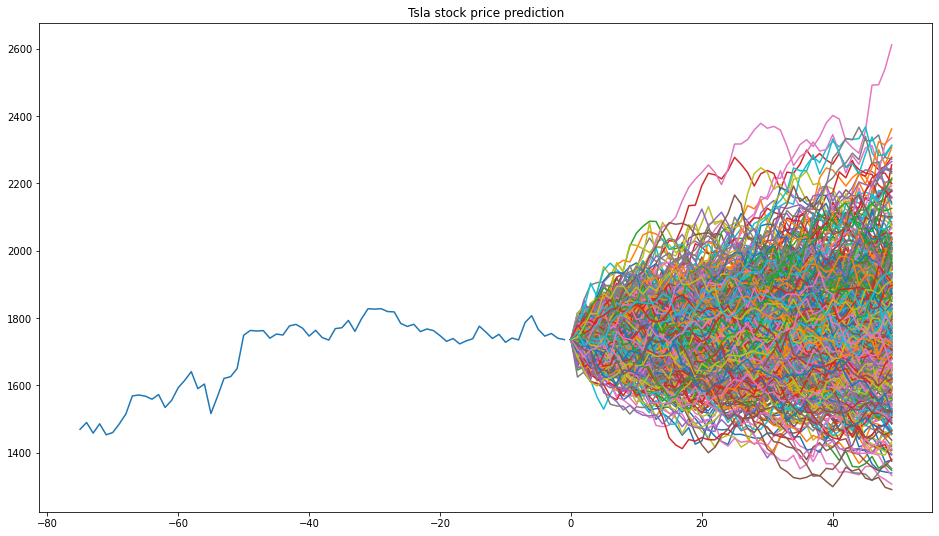

In [29]:
plt.figure(figsize=(16,9))
for i in range(d1.shape[0]):
    plt.plot(d1[i,:])
plt.plot(list(range(-75,0)),data['GOOG'].values[-75:])
plt.title('Tsla stock price prediction')

d:\envs\xylab\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

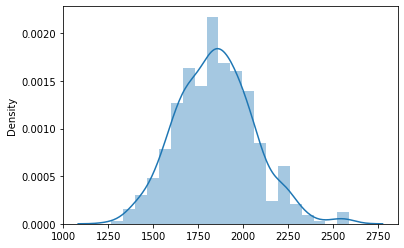

In [18]:
sns.distplot(d1[:,-1],bins=20)